# TP1 : Initiation (Alan Da Costa / Sidy Diallo)

### Import des librairies 

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows =10

print(pd.__version__)

2.2.3


#### 1. Import du fichier Capital.xls

In [239]:
df = pd.read_excel("Capital.xls")

print(df.head())

                 X      Y        Z
0  Aix en provence  18.94  Sud-Est
1          Ajaccio  22.06  Sud-Est
2           Amiens  17.97     Nord
3           Angers  18.86    Ouest
4           Annecy  14.97  Sud-Est


#### 2. Histogramme

In [242]:
nombre_villes_par_region = df["Z"].value_counts()

print(nombre_villes_par_region)
print(' ')
# for nb in nombre_villes_par_region:
pourcentage_villes = (nombre_villes_par_region / nombre_villes_par_region.sum()) * 100
print(pourcentage_villes)

Z
Ile-de-France    26
Sud-Est          18
Ouest            14
Centre           13
Est              10
Sud-Ouest        10
Nord              9
Name: count, dtype: int64
 
Z
Ile-de-France    26.0
Sud-Est          18.0
Ouest            14.0
Centre           13.0
Est              10.0
Sud-Ouest        10.0
Nord              9.0
Name: count, dtype: float64


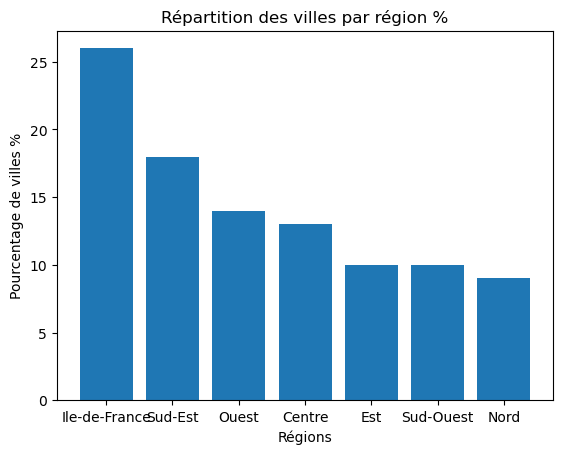

In [244]:
plt.bar(pourcentage_villes.index, pourcentage_villes.values)
plt.xlabel("Régions")
plt.ylabel("Pourcentage de villes %")
plt.title("Répartition des villes par région %")
plt.show()


#### 3.Représenter graphiquement et de différentes manières la répartition de chaque région pour cet ensemble de données. 


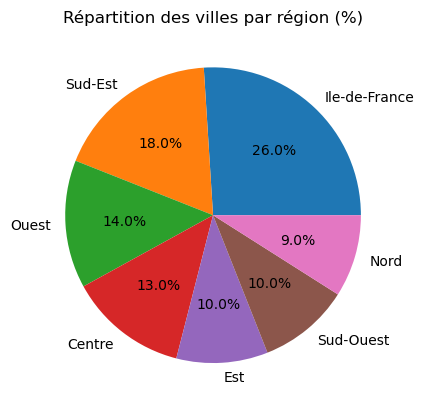

In [247]:
plt.pie(
    pourcentage_villes, 
    labels=pourcentage_villes.index, 
    autopct='%1.1f%%', 
)
plt.title("Répartition des villes par région (%)")

plt.show()

#### 4. Quelle est la région la plus représentée dans cette étude ?

La région la plus représentée dans cette étude est l'Ile-de-France.


#### 5.Calculer les différentes statistiques sur le taux de la taxe d’habitation. Regrouper ensuite ces statistiques par région.

In [252]:
df.describe()

,Y
count,100.000000
mean,17.770700
std,5.529599
min,3.680000
25%,15.062500
50%,17.625000
75%,20.522500
max,36.170000


In [254]:
df.groupby("Z").describe()

Y                                                        \
              count       mean       std    min      25%     50%      75%   
Z                                                                           
Centre         13.0  18.115385  1.906881  15.77  17.0700  17.370  19.1900   
Est            10.0  17.662000  2.095200  14.98  16.3875  16.975  18.1850   
Ile-de-France  26.0  11.764615  3.879327   3.68   9.2425  11.285  14.7375   
Nord            9.0  25.951111  7.099798  15.37  20.4600  27.970  29.9600   
Ouest          14.0  18.896429  3.098314  14.00  16.6875  18.265  21.0900   
Sud-Est        18.0  19.769444  2.938534  14.30  18.7675  19.575  21.4225   
Sud-Ouest      10.0  20.511000  4.549406  12.72  19.2700  21.010  21.9325   

                      
                 max  
Z                     
Centre         21.55  
Est            22.04  
Ile-de-France  19.32  
Nord           36.17  
Ouest          25.99  
Sud-Est        25.98  
Sud-Ouest      30.23

#### 6. Quelle est la région la plus intéressante pour le taux de la taxe d’habitation ?

Ile-de-France car ayant une moyenne bien inferieure à la moyenne globale par rapport aux autres. 

#### 7. Quelle est la région la plus représentative de la moyenne nationale ?

La région de l'Est a une moyenne qui se rapproche le plus à la moyenne globale.

#### 8. Donner en fonction du taux de la taxe d’habitation une typologie des villes françaises en 3 groupes

On va typer en fonction de la moyenne les régions de France :
- Superieures à la moyenne : Centre, Nord, Ouest, Sud-est, Sud-Ouest
- Inferieures à la moyenne : Ile-de-France
- Egales (à peu près) à la moyenne : Est

In [282]:
def afficher_groupes_villes(df, colonne_ville, colonne_taxe):
    # on va créer 3 groupes :
    # - faible taxe en dessous de 10%
    # - forte taxe au dessus de 10%
    # - taxe moyenne min et max 10%
    moyenne = df[colonne_taxe].mean()
    seuil_bas = moyenne * 0.9  # 10% en dessous
    seuil_haut = moyenne * 1.1  # 10% au-dessus
    faible_taxe = df[df[colonne_taxe] < seuil_bas]
    taxe_moyenne = df[(df[colonne_taxe] >= seuil_bas) & (df[colonne_taxe] <= seuil_haut)]
    forte_taxe = df[df[colonne_taxe] > seuil_haut]
    
    print("FAIBLE taxe d'habitation :")
    print(faible_taxe[[colonne_ville, colonne_taxe]])
    print("\n TAXE MOYENNE :")
    print(taxe_moyenne[[colonne_ville, colonne_taxe]])
    print("\n FORTE taxe d'habitation :")
    print(forte_taxe[[colonne_ville, colonne_taxe]])

afficher_groupes_villes(df, "X", "Y")

FAIBLE taxe d'habitation :
                     X      Y
4               Annecy  14.97
5              Antibes  14.30
6               Antony  11.07
9   Asnières-sur-Seine  10.13
10       Aubervilliers  12.45
..                 ...    ...
81         Saint-Denis   9.17
83  St-Maur-des-Fossés  10.82
87        Sartrouville  12.38
96          Versailles   8.95
99     Vitry-sur-Seine  11.50

[32 rows x 2 columns]

 TAXE MOYENNE :
                  X      Y
0   Aix en provence  18.94
2            Amiens  17.97
3            Angers  18.86
7        Argenteuil  16.90
14          Belfort  16.20
..              ...    ...
89           Toulon  19.37
90         Toulouse  19.23
93           Troyes  18.11
94          Valence  16.25
95       Vénissieux  18.70

[36 rows x 2 columns]

 FORTE taxe d'habitation :
                   X      Y
1            Ajaccio  22.06
8              Arles  24.49
12           Avignon  22.41
15          Besançon  20.20
16           Béziers  22.14
..               ...    ...
88

#### 9. En utilisant une fonction Python, donner les villes qui ont un taux de taxe d’habitation situé 30% au dessus ou en dessous de la moyenne. 

In [263]:
def villes_taxe_habitation(df, colonne_ville, colonne_taxe):
    moyenne = df[colonne_taxe].mean()
    seuil_bas = moyenne * 0.7  # 30% en dessous
    seuil_haut = moyenne * 1.3  # 30% au-dessus
    villes_filtrees = df[(df[colonne_taxe] < seuil_bas) | (df[colonne_taxe] > seuil_haut)]    
    return villes_filtrees[[colonne_ville, colonne_taxe]]

resultat = villes_taxe_habitation(df, "X", "Y")
print(resultat)

                       X      Y
6                 Antony  11.07
8                  Arles  24.49
9     Asnières-sur-Seine  10.13
19  Boulogne-Billancourt   9.46
21                 Brest  25.99
..                   ...    ...
87          Sartrouville  12.38
91             Tourcoing  33.61
96            Versailles   8.95
97      Villeneuve-d'Asq  29.96
99       Vitry-sur-Seine  11.50

[26 rows x 2 columns]


#### 10. . Idem pour les villes qui ont un taux de taxe d’habitation situé 20% au dessus ou en dessous de la moyenne. 

In [266]:
def villes_taxe_habitation2(df, colonne_ville, colonne_taxe):
    moyenne = df[colonne_taxe].mean()
    seuil_bas = moyenne * 0.8  # 20% en dessous
    seuil_haut = moyenne * 1.2  # 20% au-dessus
    villes_filtrees = df[(df[colonne_taxe] < seuil_bas) | (df[colonne_taxe] > seuil_haut)]    
    return villes_filtrees[[colonne_ville, colonne_taxe]]

resultat = villes_taxe_habitation2(df, "X", "Y")
print(resultat)

                     X      Y
1              Ajaccio  22.06
6               Antony  11.07
8                Arles  24.49
9   Asnières-sur-Seine  10.13
10       Aubervilliers  12.45
..                 ...    ...
88          Strasbourg  22.04
91           Tourcoing  33.61
96          Versailles   8.95
97    Villeneuve-d'Asq  29.96
99     Vitry-sur-Seine  11.50

[40 rows x 2 columns]
